#  Neural Networks

In [1]:
from IPython.display import Image
Image(filename='Image2.png',width = "600",height = "300")

FileNotFoundError: [Errno 2] No such file or directory: 'Image2.png'

1. Here, each node on the left represents an input feature, the connecting lines represent
the learned coefficients, and the node on the right represents the output, which is a
weighted sum of the inputs.

2. This model has a lot more coefficients (also called weights) to learn: there is one
between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.

3. Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result—usually the rectifying nonlinearity (also
known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of
this function is then used in the weighted sum that computes the output, ŷ. The two
functions are visualized in the following Figure. The relu cuts off values below zero, while tanh
saturates to –1 for low input values and +1 for high input values. Either nonlinear
function allows the neural network to learn much more complicated functions than a
linear model could:

In [2]:
from IPython.display import Image
Image(filename='Image3.png',width = "400",height = "300")

FileNotFoundError: [Errno 2] No such file or directory: 'Image3.png'

For the small neural network pictured in the first figure, the full formula for computing ŷ in the case of regression would be (when using a tanh nonlinearity):   
h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])   
h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])   
h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])   
ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

Here, **w** are the weights between the input **x** and the hidden layer **h**, and **v** are the
weights between the hidden layer **h** and the output ŷ. The weights **v** and **w** are learned
from data, **x** are the input features, ŷ is the computed output, and **h** are intermediate
computations. An important parameter that needs to be set by the user is the number
of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets
and as big as 10,000 for very complex data.

Having large neural networks made up of many of these layers of computation is
what inspired the term “deep learning.”

# Data used here

Here, we use the data **Avila** from UCI: https://archive.ics.uci.edu/ml/datasets/Avila#. The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. In this lab, the‘avila-tr.txt'data is used. For your convenience, I have pre-processed an 'CSV' file in the Github.

## Data Set Information:

CLASS DISTRIBUTION (training set) 
A: 4286 
B: 5 
C: 103 
D: 352 
E: 1095 
F: 1961 
G: 446 
H: 519 
I: 831 
W: 44 
X: 522 
Y: 266

## Attribute Information:

F1: intercolumnar distance 
F2: upper margin 
F3: lower margin 
F4: exploitation 
F5: row number 
F6: modular ratio 
F7: interlinear spacing 
F8: weight 
F9: peak number 
F10: modular ratio/ interlinear spacing 
Class: A, B, C, D, E, F, G, H, I, W, X, Y

## Relevant Papers:

C. DeÂ Stefano, M. Maniaci, F. Fontanella, A. ScottoÂ diÂ Freca, 
Reliable writer identification in medieval manuscripts through page layout features: The 'Avila' Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110. 

C. De Stefano, F. Fontanella, M. Maniaci and A. Scotto di Freca, 'A Method for Scribe Distinction in Medieval Manuscripts Using Page Layout Features', Lecture Notes in Computer Science, G. Maino and G. Foresti (eds.), Springer-Verlag, vol. 6978, pp. 393-402.

# Load the data

In [4]:
import pandas as pd
data=pd.read_csv("data/avila-tr.csv")
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# Look at the size of the data

In [5]:
data.shape

(10430, 11)

In [13]:
len(data.Class.unique())

12

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


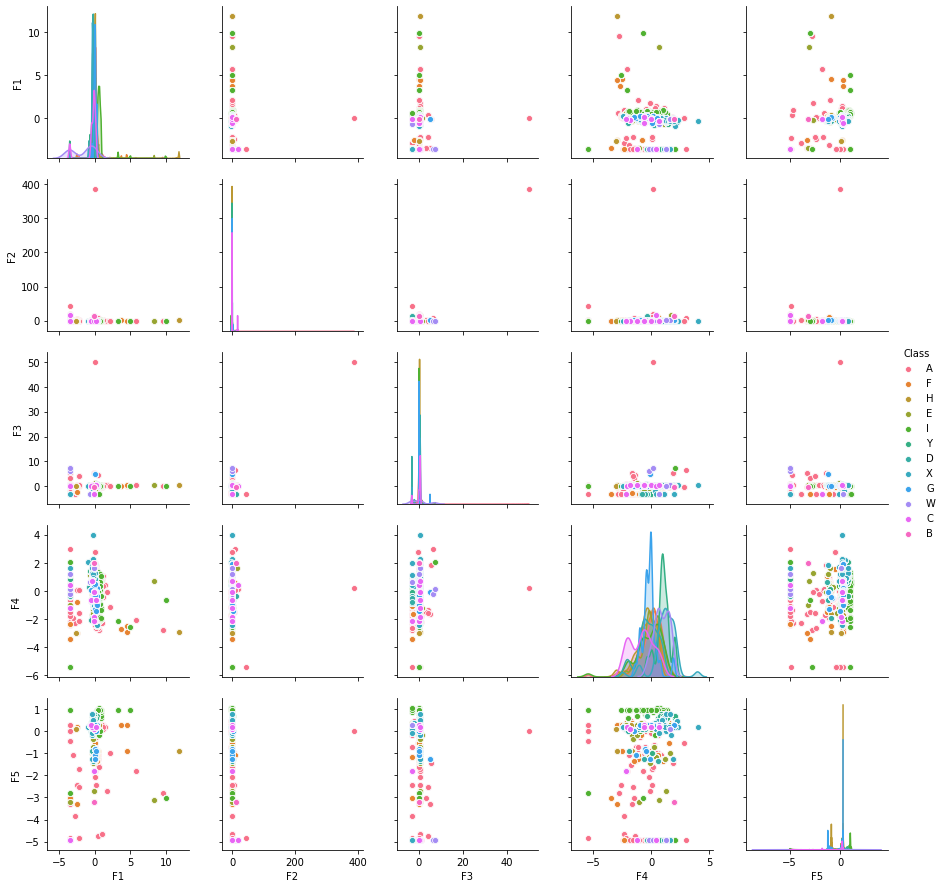

In [20]:
import seaborn as sns
sns.pairplot(data[['F1', 'F2', 'F3', 'F4', 'F5', 'Class']], hue = 'Class')

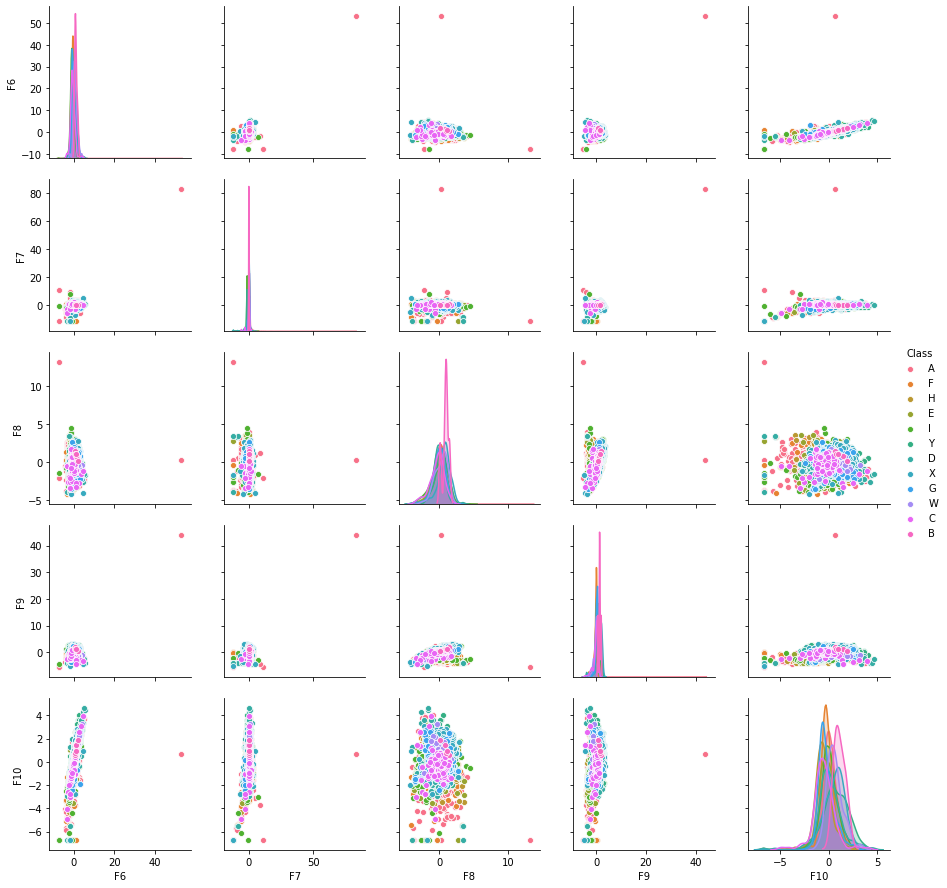

In [21]:
sns.pairplot(data[['F6', 'F7', 'F8', 'F9', 'F10', 'Class']], hue = 'Class')

# 1 Training an MLPClassifier

### **Q1**. When training the model, 70% of data is used as the training set with the rest as the test set.

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, random_state = 142)
X_cols = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']
y_col = 'Class'

X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

print('Dimension of X_train: ', X_train.shape)
print('Dimension of y_train: ', y_train.shape)
print('Dimension of X_test: ', X_test.shape)
print('Dimension of y_test: ', y_test.shape)

Dimension of X_train:  (7301, 10)
Dimension of y_train:  (7301,)
Dimension of X_test:  (3129, 10)
Dimension of y_test:  (3129,)


### **Q2**. Training the MLPClassifier with default parameters (random_state=0)

In [36]:
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier(random_state = 0)

neural_net.fit(X_train, y_train)
y_test_pred = neural_net.predict(X_test)
y_train_pred = neural_net.predict(X_train)

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### **Q3**. Output the accuracy on training data and test data respectively.

In [37]:
nn_train_acc = np.mean(y_train == y_train_pred)
nn_test_acc = np.mean(y_test == y_test_pred)
print('Accuracy of Neural Network on training dataset: ', nn_train_acc)
print('Accuracy of Neural Network on testing dataset: ', nn_test_acc)

Accuracy of Neural Network on training dataset:  0.8037255170524585
Accuracy of Neural Network on testing dataset:  0.7647810802173218


### **Q4**. Compare the results with Naive Bayes (GaussianNB) and K-Nearest Neighbors (K==1) 

In [31]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_acc = np.mean(y_test == y_pred)
print('Accuracy of Gaussian Naive Bayes: ', gnb_acc)

Accuracy of Gaussian Naive Bayes:  0.28922978587408116


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = np.mean(y_test == y_pred)
print('Accuracy of K Nearest Neighbor: ', knn_acc)

Accuracy of K Nearest Neighbor:  0.7369766698625759


# 2 Increase the number of iterations

In **Q2**, you must receive a warning which shows something about "Maximum iterations (200) reached and the optimization hasn't converged yet". This means the default iterations 200 cannot reach the optimization for the 'avila' data used in the experiment. 

### **Q5**. Here, please draw a figure to report the accuracy on the training data and test data both with different number of iterations [200,400,600,800,1000]. Use the **Q1** for data split. Please refer to 'mlp = MLPClassifier(random_state=0, max_iter=iteration)'.

In [40]:
from sklearn.metrics import accuracy_score
iterations = [200, 400, 600, 800, 1000]
train_scores = []
test_scores = []
for iteration in iterations:
    mlp = MLPClassifier(random_state = 0, max_iter = iteration)
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


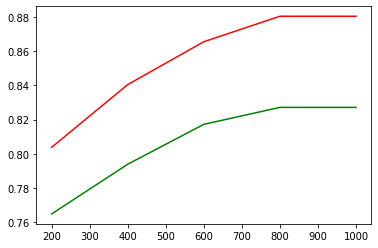

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(iterations, train_scores, c = 'r')
plt.plot(iterations, test_scores, c = 'g')

# 3 Increase the number of hidden units

### **Q6**. Here, please draw a figure to report the accuracy on the training data and test data both with different number of hidden units [10,20,30,40,50,60,70,80,90,100]. Use the **Q1** for data split. Please refer to 'mlp = MLPClassifier(hidden_layer_sizes=[the number of hidden units], random_state=0)'.

In [42]:
hidden_units = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_scores = []
test_scores = []
for units in hidden_units:
    mlp = MLPClassifier(random_state = 0, max_iter = 1000, hidden_layer_sizes = units)
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conver

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

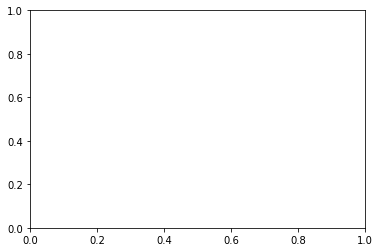

In [54]:
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.plot(hidden_units, train_scores, c = 'r')
plt.plot(hidden_units, test_scores, c = 'g')

# 4 Use different solvers.

### **Q7**. Here, please draw a figure to report the accuray on the training data and test data both with differnt solvers. ['lbfgs','sgd', 'adam']. Use the **Q1** for data split. Please refer to 'mlp = MLPClassifier(solver='lbfgs', random_state=0)'.

In [44]:
solver_list = ['lbfgs', 'sgd', 'adam']
train_scores = []
test_scores = []
for solver in solver_list:
    mlp = MLPClassifier(random_state = 0, max_iter = 1000, solver = solver, hidden_layer_sizes = 90)
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


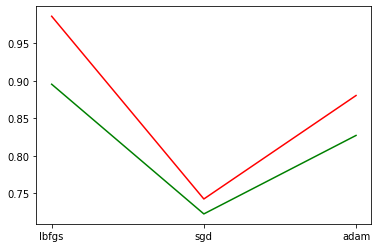

In [45]:
plt.xlabel('Solvers')
plt.ylabel('Accuracy')
plt.plot(solver_list, train_scores, c = 'r')
plt.plot(solver_list, test_scores, c = 'g')

# 5 Use different values of alpha.

### **Q8**. Here, please draw a figure to report the accuray on the training data and test data both with differnt values of alpha [0.0001,0.001,0.01, 0.1,1]. Use the **Q1** for data split. Please refer to 'mlp = MLPClassifier(alpha=alpha, random_state=0)'.

In [47]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores = []
test_scores = []
for alpha in alpha_list:
    mlp = MLPClassifier(random_state = 0, max_iter = 1000, solver = 'lbfgs', hidden_layer_sizes = 90, alpha = alpha)
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

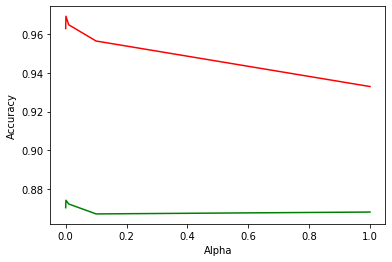

In [55]:
plt.xlabel('Alpha Levels')
plt.ylabel('Accuracy')
plt.plot(alpha_list, train_scores, c = 'r')
plt.plot(alpha_list, test_scores, c = 'g')